In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#load the dataset
Data= pd.read_csv('mushroom.csv')
Data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
Data.shape

(2000, 26)

In [4]:
Data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
#checking the null values
Data.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [7]:
#print the numerical columns names
Data.select_dtypes(include=['int64','float64']).columns

Index(['Unnamed: 0', 'stalk_height', 'cap_diameter'], dtype='object')

In [8]:
# Droping unnaccessary column
Data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [10]:
numerical_columns = Data[['stalk_height', 'cap_diameter']]
numerical_columns.head()

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245


In [11]:
Data.select_dtypes(include=['object']).columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

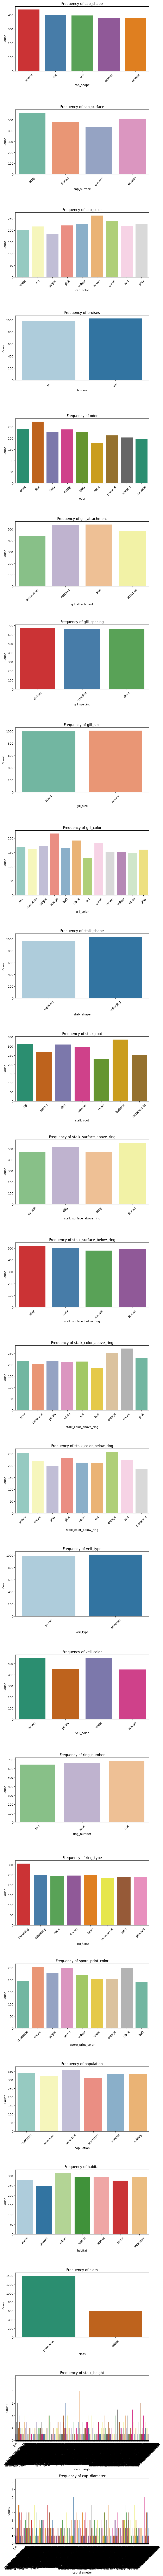

In [12]:
# Create a single figure with multiple subplots
# Create subplots
fig, axes = plt.subplots(len(Data.columns), 1, figsize=(8, len(Data.columns) * 5))

palettes = ['Set1', 'Set2', 'Set3', 'Paired', 'Dark2', 'Accent']
# Plot count plots for each categorical column
for i, column in enumerate(Data.columns):
    sns.countplot(data=Data, x=column, ax=axes[i],palette=palettes[i % len(palettes)])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualization Based On The Classes Vs Indepdendent Columns

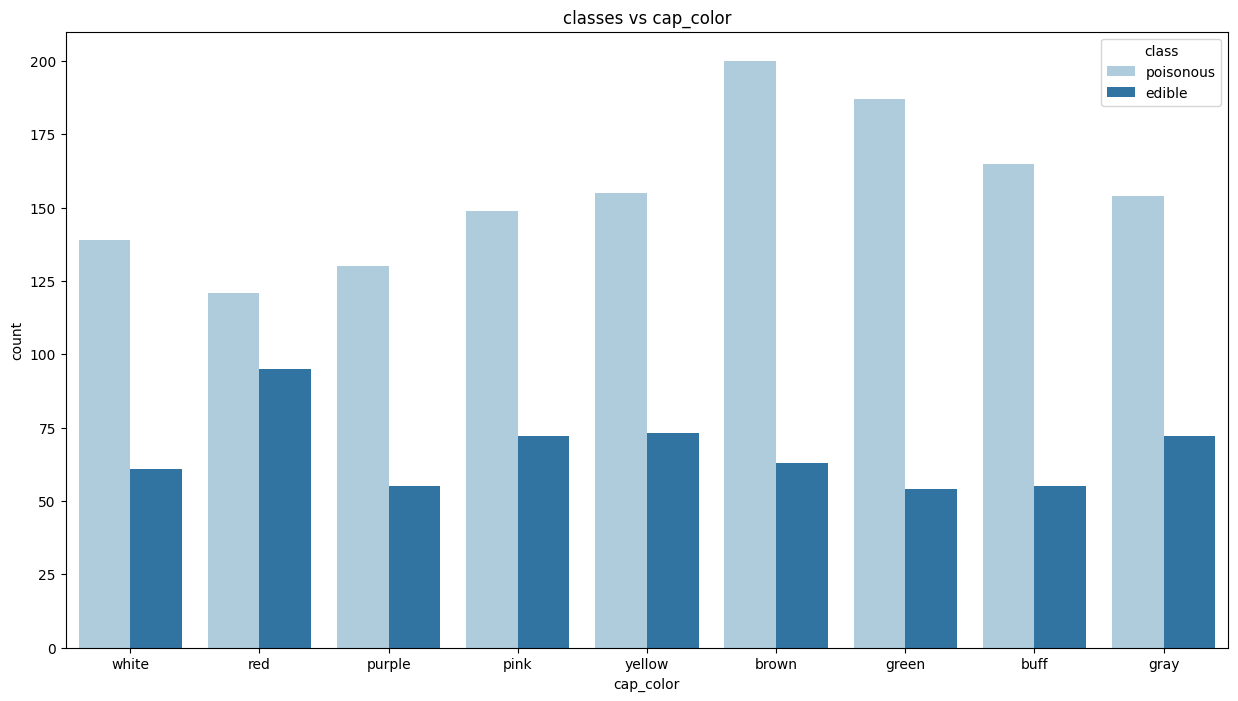

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(data = Data, x ='cap_color',hue ='class', palette="Paired")
plt.title('classes vs cap_color')
plt.show()

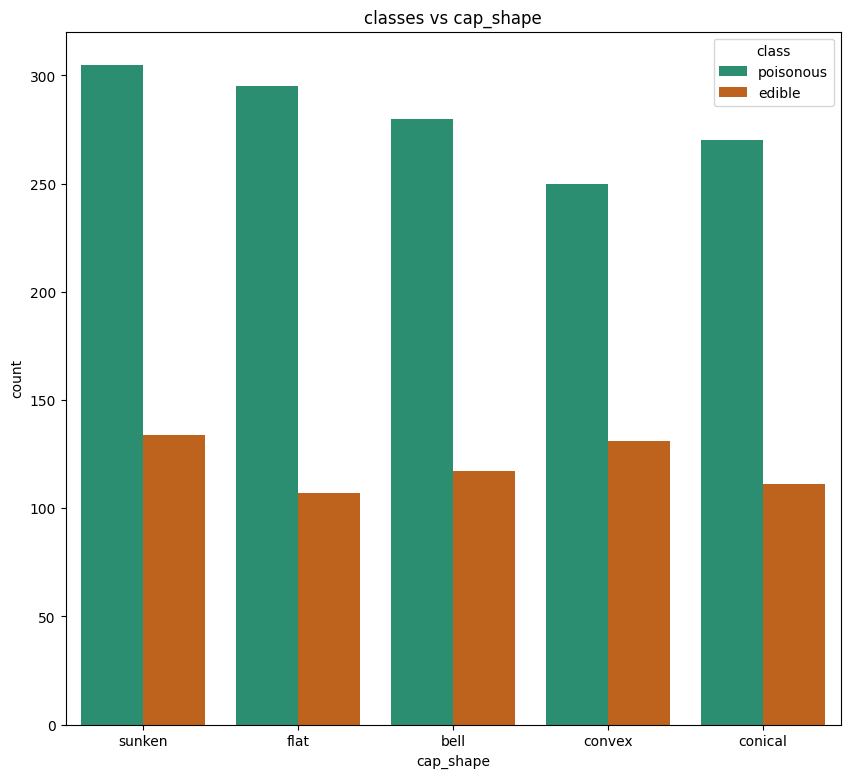

In [14]:
plt.figure(figsize=(10, 9))
sns.countplot(data = Data, x ='cap_shape',hue ='class', palette="Dark2")
plt.title('classes vs cap_shape')
plt.show()

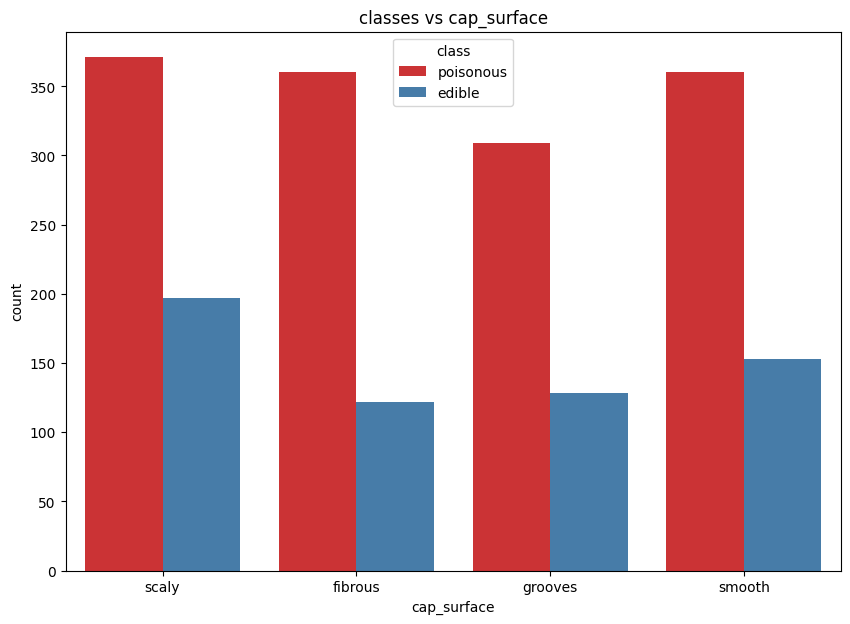

In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(data = Data, x ='cap_surface',hue ='class', palette="Set1")
plt.title('classes vs cap_surface')
plt.show()

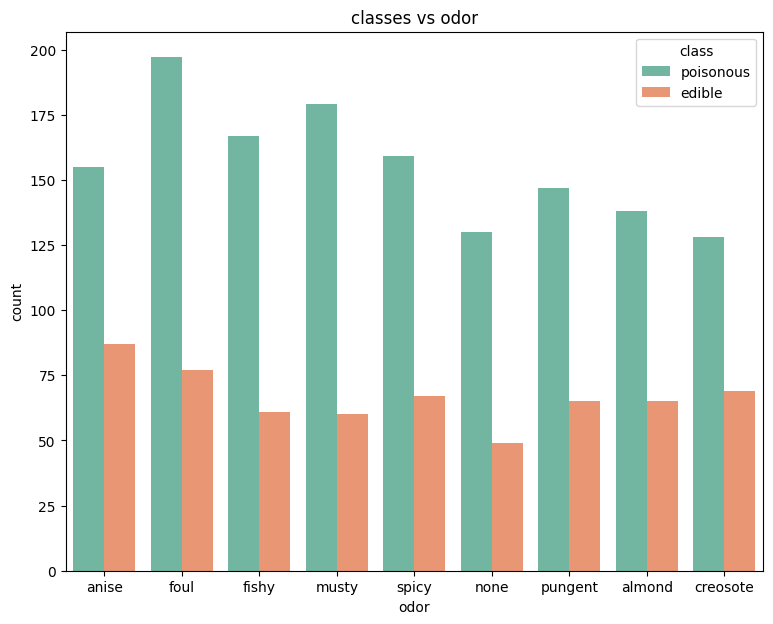

In [16]:

plt.figure(figsize=(9, 7))
sns.countplot(data = Data, x ='odor',hue ='class', palette="Set2")
plt.title('classes vs odor')
plt.show()

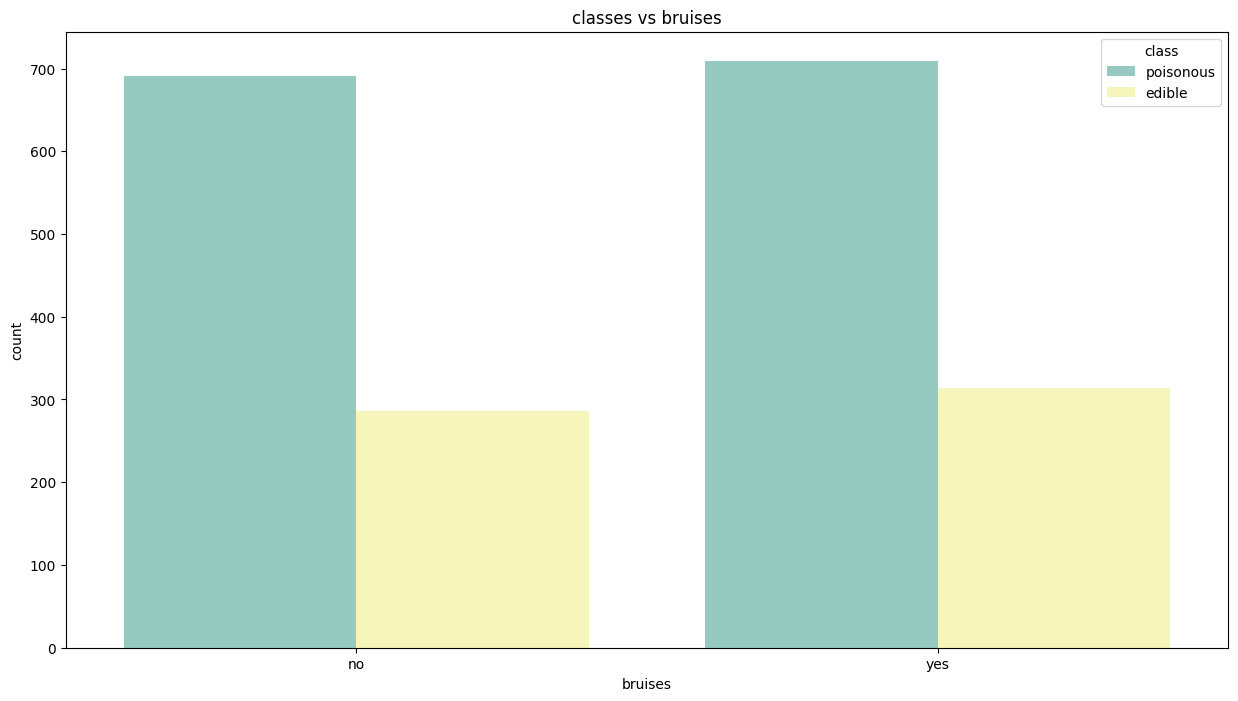

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(data = Data, x ='bruises',hue ='class', palette="Set3")
plt.title('classes vs bruises')
plt.show()

# Investigate feature correlations to discern relationships within the data

In [18]:
# Convert categorical columns to numeric
Data_encoded = Data.copy()

for col in Data_encoded.select_dtypes(include=['object']).columns:
    Data_encoded[col] = Data_encoded[col].astype('category').cat.codes

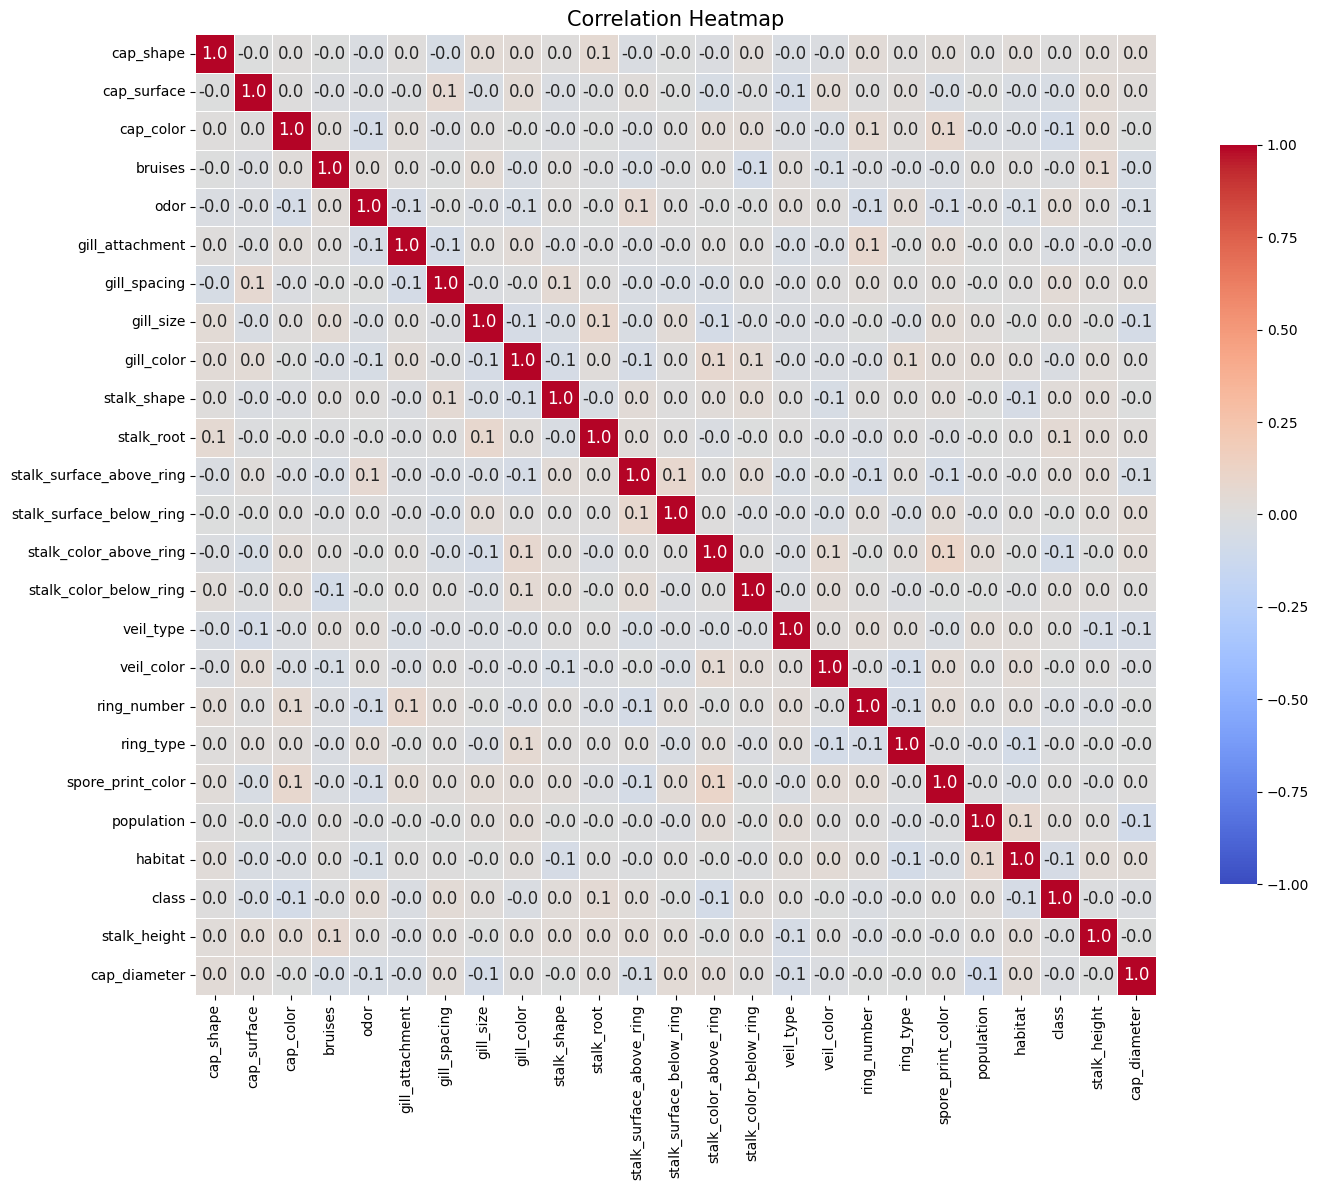

In [19]:
# Calculate and visualize correlations between numeric features
plt.figure(figsize=(15, 12))
sns.heatmap(Data_encoded.corr(),annot=True,  # Show correlation values
            fmt=".1f",   # Format the annotation to 1 decimal places
            cmap='coolwarm',
            vmin=-1, vmax=1,  # Ensure the color range spans from -1 to 1
            linewidths=0.6,  # Add lines between cells
            linecolor='white',  # Make the grid lines white for contrast
            square=True,  # Make the cells square
            cbar_kws={"shrink": 0.77},  # Shrink the color bar
            annot_kws={"size": 12}  # annotation font size
           )
plt.title('Correlation Heatmap',fontsize=15)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [20]:
# Separate independent variables(X) and dependent variable(Y)
x = Data.drop('class', axis=1)
y = Data['class']

In [21]:
#encoded the independent variables
encoded_x = pd.get_dummies(x)
encoded_x
 # 0 for False and  1 for True

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


# Support Vector Machine(SVM)

In [22]:
# Split the data into training and testing(70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.3, random_state=42)

In [23]:
x_train

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
836,2.078784,16.765547,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
575,6.494950,6.142622,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
557,6.483619,2.766475,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1235,14.295124,13.598769,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1360,5.082636,6.235132,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,10.973666,13.435538,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1294,2.570015,8.892683,False,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
860,3.628180,9.636546,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1459,6.156392,22.060143,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [24]:
y_train

,class
836,edible
575,poisonous
557,poisonous
1235,poisonous
1360,poisonous
...,...
1130,edible
1294,poisonous
860,poisonous
1459,poisonous


In [25]:
x_train.shape,y_train.shape

((1400, 126), (1400,))

In [26]:
x_test.shape,y_test.shape

((600, 126), (600,))

# Feature Scaling

In [27]:
scale = StandardScaler()   #using standard scaler
scale

StandardScaler()

In [28]:
#fit the data on train and test
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

In [29]:
x_train_scale

array([[-1.7666593 ,  0.62548115, -0.48769111, ...,  2.24957909,
        -0.40943827, -0.41418368],
       [-0.55667346, -0.86269729,  2.05047823, ..., -0.4445276 ,
        -0.40943827, -0.41418368],
       [-0.55977802, -1.33566586,  2.05047823, ..., -0.4445276 ,
        -0.40943827, -0.41418368],
       ...,
       [-1.34214006, -0.37322932, -0.48769111, ..., -0.4445276 ,
         2.4423706 , -0.41418368],
       [-0.64943502,  1.36720758, -0.48769111, ..., -0.4445276 ,
         2.4423706 , -0.41418368],
       [-0.5856455 ,  1.55884473, -0.48769111, ..., -0.4445276 ,
        -0.40943827,  2.41438777]])

In [30]:
x_test_scale

array([[-0.83905127, -0.36805706, -0.52075564, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [ 1.39597581, -1.24436986, -0.52075564, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [ 1.42438397, -0.50550368, -0.52075564, ..., -0.40626167,
        -0.38939887,  2.38047614],
       ...,
       [-0.2078992 , -0.86249971, -0.52075564, ..., -0.40626167,
         2.56806088, -0.42008403],
       [ 0.42374628, -0.75315627,  1.92028644, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [-0.6414332 , -1.33070755, -0.52075564, ..., -0.40626167,
        -0.38939887,  2.38047614]])

# Model Building

In [31]:
#rbf (Radial Basis Function) Kernel-it is non-linear kernel that can handle complex relationships in the data.
#It maps data points into an infinite-dimensional space and forms a decision boundary based on their distance from each other.

svc = SVC(kernel='rbf', random_state=40)

In [32]:
svc.fit(x_train_scale, y_train)

SVC(random_state=40)

In [33]:
#predict on the test data
y_prediction = svc.predict(x_test_scale)

# SVM Implementation

In [36]:
#Classification report
print(classification_report(y_prediction,y_test))

              precision    recall  f1-score   support

      edible       0.51      0.94      0.66       100
   poisonous       0.99      0.82      0.89       500

    accuracy                           0.84       600
   macro avg       0.75      0.88      0.78       600
weighted avg       0.91      0.84      0.85       600



In [37]:
print(confusion_matrix(y_prediction,y_test))

[[ 94   6]
 [ 91 409]]


**Parameter Tuning and Optimization**

In [43]:
parameters = {
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [0.01, 0.001, 0.0001],
    'C': [0.01, 0.1, 1, 10, 100],  # Extended the range to explore lower and higher regularization
}

In [44]:
Result = GridSearchCV(SVC(), param_grid = parameters, verbose = 3, cv=2) #Verbose controls the level of output you see during the process.
#Cross-validation (cv) determines how many folds the dataset will be split into during the cross-validation process.

In [45]:
Result.fit(x_train_scale, y_train)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
[CV 1/2] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.703 total time=   0.2s
[CV 2/2] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.2s
[CV 1/2] END .C=0.01, gamma=0.01, kernel=linear;, score=0.709 total time=   0.1s
[CV 2/2] END .C=0.01, gamma=0.01, kernel=linear;, score=0.711 total time=   0.1s
[CV 1/2] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.703 total time=   0.1s
[CV 2/2] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.704 total time=   0.1s
[CV 1/2] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.703 total time=   0.1s
[CV 2/2] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.704 total time=   0.1s
[CV 1/2] END C=0.01, gamma=0.001, kernel=linear;, score=0.709 total time=   0.1s
[CV 2/2] END C=0.01, gamma=0.001, kernel=linear;, score=0.711 total time=   0.1s
[CV 1/2] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.703 total time=   0.0s
[CV 2/2] END ..C=0.01, gamma=0.001, kernel=poly;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [46]:
#finding the best parameter
Result.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [47]:
y_prediction_final = Result.predict(x_test_scale)

In [48]:
# Classification report
print(classification_report(y_prediction_final,y_test))

              precision    recall  f1-score   support

      edible       0.62      1.00      0.76       114
   poisonous       1.00      0.85      0.92       486

    accuracy                           0.88       600
   macro avg       0.81      0.93      0.84       600
weighted avg       0.93      0.88      0.89       600



**Comparison and Analysis**


**1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

The **linear kernel** applies no transformation to the data and uses a straight line (or hyperplane) to separate classes.Data is linearly separable or approximately linearly separable.The **polynomial kernel** uses polynomial functions to map the input data into a higher-dimensional space, allowing the decision boundary to be a polynomial curve.Data is non-linearly separable but can be fit with a polynomial decision boundary.The **RBF kernel** (also called Gaussian kernel) maps data points into an infinite-dimensional space, allowing it to model highly complex and non-linear decision boundaries.

**2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

**Strengths:**SVM is well-suited for the Mushroom dataset due to its ability to handle non-linear decision boundaries (via kernels like RBF) and its robustness in binary classification tasks.
It works efficiently with clear class separability and can be regularized to avoid overfitting.

**Weaknesses:**
SVM may suffer from scaling issues and high computational cost, especially with non-linear kernels for larger datasets.
It might be sensitive to hyperparameter tuning and feature preprocessing, which are crucial to achieve optimal performance.
To maximize SVM's performance for the Mushroom dataset, you would need to ensure proper feature scaling, choose an appropriate kernel (likely RBF for non-linear separability), and carefully tune the hyperparameters.

**3.	Discuss practical implications of SVM in real-world classification tasks.**

Support Vector Machines (SVM) are powerful tools for real-world classification tasks, particularly in cases with clear class boundaries or high-dimensional data, such as text classification and image recognition. Their ability to handle non-linear decision boundaries using kernels makes them versatile for complex datasets. However, SVM can be computationally expensive, especially with large datasets or complex kernels like RBF. Additionally, careful tuning of hyperparameters and feature scaling is essential for optimal performance and avoiding overfitting.